# LIBRAIRIES

In [1]:
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_final = pd.read_csv("df_final.csv")

In [3]:
df_final.head()

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,...,C_C++,Docker,ABAP,WLang,city,Department_Search,salary_min,salary_max,salary_period,salary_mean
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,Toulouse,Haute-Garonne,30000.0,45000.0,year,37500.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,Bordeaux,Gironde,35000.0,40000.0,year,37500.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,Paris,75,40000.0,65000.0,year,52500.0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,Lyon,Rhône,35000.0,60000.0,year,47500.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Corbas,Rhône,40000.0,45000.0,year,42500.0


# CLUSTERING & SELECTION CLASSES FOR ANNUAL SALARY

In [4]:
df_annually = df_final[df_final.salary_period == "year"]

In [5]:
df_annually = df_annually.reset_index(drop=True)
df_annually

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,...,C_C++,Docker,ABAP,WLang,city,Department_Search,salary_min,salary_max,salary_period,salary_mean
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,Toulouse,Haute-Garonne,30000.0,45000.0,year,37500.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,Bordeaux,Gironde,35000.0,40000.0,year,37500.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,Paris,75,40000.0,65000.0,year,52500.0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,Lyon,Rhône,35000.0,60000.0,year,47500.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Corbas,Rhône,40000.0,45000.0,year,42500.0
5,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,Paris,75,32000.0,37000.0,year,34500.0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,Lyon,Rhône,30000.0,40000.0,year,35000.0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,Paris,75,35000.0,38000.0,year,36500.0
8,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,Bordeaux,Gironde,40000.0,50000.0,year,45000.0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,Toulouse,Haute-Garonne,35000.0,45000.0,year,40000.0


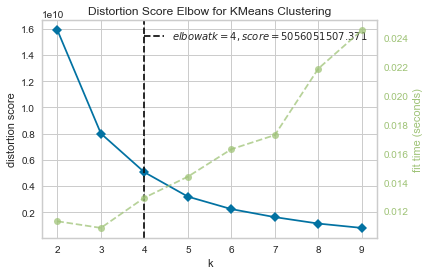

In [6]:
model= KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_annually.salary_min.values.reshape(-1,1))
visualizer.poof()

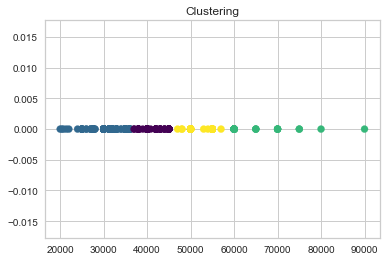

In [7]:
kmeans = KMeans(n_clusters=4).fit(df_annually.salary_min.values.reshape(-1,1))
labels = kmeans.predict(df_annually.salary_min.values.reshape(-1,1))
plt.title('Clustering')
plt.scatter(df_annually.salary_min, np.zeros_like(df_annually.salary_min), c=labels, cmap='viridis')
plt.show()

In [8]:
pd.Series(labels).value_counts()

1    162
0    137
3     63
2     38
dtype: int64

In [9]:
kmeans.cluster_centers_

array([[41370.80291971],
       [31468.86419753],
       [63815.78947368],
       [51539.68253968]])

In [10]:
labels

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 1,
       3, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 3, 1, 3, 1, 0,
       1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1,
       3, 1, 2, 3, 2, 1, 0, 1, 0, 2, 0, 1, 0, 3, 1, 3, 1, 0, 0, 1, 3, 3,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 3, 2, 3, 3, 3, 1, 3,
       1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 3, 2, 1,
       3, 1, 2, 3, 1, 0, 0, 0, 0, 3, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 1, 1, 3, 0, 1, 0, 0, 3, 3, 3, 1, 0, 0, 1, 1, 0, 3, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 3,
       3, 1, 0, 1, 2, 1, 0, 0, 2, 1, 3, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 3, 2, 1, 1, 0, 1, 1, 3, 1, 0, 1, 2, 1, 3, 3, 2, 3, 0, 0,
       0, 3, 3, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 1, 1, 3, 3, 1, 3, 1, 1, 1, 0, 3, 2, 0, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 0, 1, 1, 0, 3, 0, 1, 1, 3, 3, 1, 1, 0, 1,

In [11]:
df_annually["labels"]=pd.Series(labels)

## Extract clusters boundaries

In [12]:
print("The boundaries of label 0 are {} and {}"
      .format(df_annually[df_annually.labels==0]["salary_min"].min(),
              df_annually[df_annually.labels==0]["salary_min"].max()))
print("The boundaries of label 1 are {} and {}"
      .format(df_annually[df_annually.labels==1]["salary_min"].min(),
              df_annually[df_annually.labels==1]["salary_min"].max()))
print("The boundaries of label 2 are {} and {}"
      .format(df_annually[df_annually.labels==2]["salary_min"].min(),
              df_annually[df_annually.labels==2]["salary_min"].max()))
print("The boundaries of label 3 are {} and {}"
      .format(df_annually[df_annually.labels==3]["salary_min"].min(),
              df_annually[df_annually.labels==3]["salary_min"].max()))

The boundaries of label 0 are 37000.0 and 45000.0
The boundaries of label 1 are 20000.0 and 36000.0
The boundaries of label 2 are 60000.0 and 90000.0
The boundaries of label 3 are 47000.0 and 57000.0


# MACHINE LEARNING

In [13]:
pd.set_option('display.max_columns', 100)

Selecting X

In [14]:
df_annually_encoded = pd.get_dummies(df_annually, columns=['city'])

In [15]:
df_annually_encoded

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,experience_max,BTS,DEUG,DUT,IUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,Department_Search,salary_min,salary_max,salary_period,salary_mean,labels,city_Ancenis,city_Blagnac,city_Bordeaux,city_Bruges,city_Canéjan,city_Castanet-Tolosan,city_Charbonnières-les-Bains,city_Corbas,city_Gradignan,city_Labège,city_Limonest,city_Lissieu,city_Loire-Atlantique,city_Lyon,city_Marennes,city_Mérignac,city_Nantes,city_Paris,city_Pessac,city_Portet-sur-Garonne,city_Rhône,city_Rillieux-la-Pape,city_Saint-Herblain,city_Saint-Nazaire,city_Tassin-la-Demi-Lune,city_Toulouse,city_Toussieu,city_Villeneuve-lès-Bouloc,city_Villeurbanne,city_Écully
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Haute-Garonne,30000.0,45000.0,year,37500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,Gironde,35000.0,40000.0,year,37500.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,75,40000.0,65000.0,year,52500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,5.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rhône,35000.0,60000.0,year,47500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rhône,40000.0,45000.0,year,42500.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,75,32000.0,37000.0,year,34500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,Rhône,30000.0,40000.0,year,35000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,35000.0,38000.0,year,36500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3.0,5.0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,Gironde,40000.0,50000.0,year,45000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,5.0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,Haute-Garonne,35000.0,45000.0,year,40000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
df_annually.describe()

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,experience_max,BTS,DEUG,DUT,IUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,salary_min,salary_max,salary_mean,labels
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.0000,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.220000,0.020000,0.04250,0.037500,0.007500,0.172500,0.02750,0.650000,0.052500,0.160000,0.047500,0.032500,0.02500,0.165000,0.007500,0.007500,0.020000,0.017500,0.02750,0.080000,0.08750,0.012500,0.0025,2.877500,3.427500,0.022500,0.112500,0.012500,0.0,0.190000,0.402500,0.005000,0.110000,0.980000,0.0025,0.04250,0.020000,0.250000,0.432500,0.08750,0.030000,0.505000,0.1425,0.092500,0.48750,0.355000,0.047500,0.03500,0.215000,0.23500,0.190000,0.100000,0.147500,0.465000,0.122500,0.02500,0.28500,0.070000,0.227500,0.005000,0.005000,41094.390000,50179.490000,45636.940000,1.067500
std,0.414765,0.140175,0.20198,0.190221,0.086385,0.378288,0.16374,0.477567,0.223312,0.367065,0.212972,0.177546,0.15632,0.371645,0.086385,0.086385,0.140175,0.131289,0.16374,0.271633,0.28292,0.111242,0.0500,1.820929,2.354486,0.148489,0.316376,0.111242,0.0,0.392792,0.491016,0.070622,0.313282,0.140175,0.0500,0.20198,0.140175,0.433555,0.496043,0.28292,0.170801,0.500601,0.3500,0.290093,0.50047,0.479113,0.212972,0.18401,0.411337,0.42453,0.392792,0.300376,0.355048,0.499398,0.328273,0.15632,0.45198,0.255467,0.419743,0.070622,0.070622,10800.421743,13382.746078,11598.550638,1.032283
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,20000.000000,20388.000000,20388.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,33000.000000,40000.000000,37500.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,2.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0000,

We drop IUT because standard deviation (variance) =0

In [17]:
x= df_annually_encoded.drop(['salary_mean','salary_min', 'salary_max', 'Department_Search', 'labels', 'salary_period', 'experience_max', "IUT"], axis=1)

In [18]:
x

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,BTS,DEUG,DUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,city_Ancenis,city_Blagnac,city_Bordeaux,city_Bruges,city_Canéjan,city_Castanet-Tolosan,city_Charbonnières-les-Bains,city_Corbas,city_Gradignan,city_Labège,city_Limonest,city_Lissieu,city_Loire-Atlantique,city_Lyon,city_Marennes,city_Mérignac,city_Nantes,city_Paris,city_Pessac,city_Portet-sur-Garonne,city_Rhône,city_Rillieux-la-Pape,city_Saint-Herblain,city_Saint-Nazaire,city_Tassin-la-Demi-Lune,city_Toulouse,city_Toussieu,city_Villeneuve-lès-Bouloc,city_Villeurbanne,city_Écully
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3.0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
y = df_annually["labels"]

##### ML

- STEP 1:
    * tester modèles classiques :
        * regression logistique (Ivan) SVM linear (Ivan)
        * SVM kernel (Ivan)
    * tester modèles de boost random forest (Ivan)
        * adaboost xgboost

- STEP 2 :
    * revoir les features X, et vérifier si amélioration de l'accuracy
    * faire grid search (tester au sein d'un mm modèle différents paramètres) (Ivan)

PREDICTIONS
    - CDI/CDD --> ANNUEL
    - STAGE --> MENSUEL
    - FREELANCE  --> HEBDOMADAIRE (conversion salaire journalier et horaire en hebdomadaire)

### CLASSIC MODELS

#### Régression logistique

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

logistic = LogisticRegression(random_state =0, solver='liblinear', multi_class='auto')
logistic.fit(X_train, y_train)
print("L'accuracy est de {:.2f} %".format(logistic.score(X_test,y_test)*100))

L'accuracy est de 46.67 %


In [21]:
logistic.score(X_train,y_train)

0.7464285714285714

In [22]:
y_pred=logistic.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[14 21  1  5]
 [ 9 39  0  1]
 [ 5  1  3  2]
 [ 9  5  5  0]]


#### SVM linear

In [23]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(svm_clf.score(X_test,y_test)*100))

L'accuracy est de 55.83 %


In [24]:
svm_clf.score(X_train,y_train)

0.8

#### SVM rbf

In [25]:
svm_clf = SVC(kernel='rbf',gamma='auto')
svm_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(svm_clf.score(X_test,y_test)*100))

L'accuracy est de 49.17 %


In [26]:
svm_clf.score(X_train,y_train)

0.5678571428571428

#### Random Forest Classifier

In [27]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=0)
rf_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(rf_clf.score(X_test,y_test)*100))

L'accuracy est de 51.67 %


In [28]:
rf_clf.score(X_train,y_train)

0.5678571428571428

### BOOSTING MODELS

#### Adaboost

In [29]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(ada_clf.score(X_test,y_test)*100))

L'accuracy est de 45.00 %


In [30]:
ada_clf.score(X_train,y_train)

0.6107142857142858

#### Xgboost

In [31]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softmax', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1, eval_metric="merror")

xgb_clf.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

#print("L'accuracy est de {:.2f} %".format(xgb_clf.score(X_test,y_test)*100))
y_pred = xgb_clf.predict(X_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-merror:0.483333
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.458333
[2]	validation_0-merror:0.475
[3]	validation_0-merror:0.466667
[4]	validation_0-merror:0.475
[5]	validation_0-merror:0.475
[6]	validation_0-merror:0.458333
Stopping. Best iteration:
[1]	validation_0-merror:0.458333



0.5416666666666666

In [32]:
xgb_clf.score(X_train,y_train)

0.6107142857142858

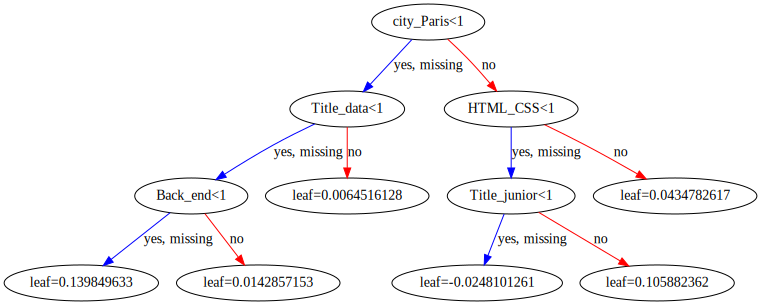

In [33]:
xgb.to_graphviz(xgb_clf, num_trees=xgb_clf.best_iteration)

# Feature selection - Correlation and P value

In [33]:
corr = x.corr()

In [34]:
corr.head(10)

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,BTS,DEUG,DUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,city_Ancenis,city_Blagnac,city_Bordeaux,city_Bruges,city_Canéjan,city_Castanet-Tolosan,city_Charbonnières-les-Bains,city_Corbas,city_Gradignan,city_Labège,city_Limonest,city_Lissieu,city_Loire-Atlantique,city_Lyon,city_Marennes,city_Mérignac,city_Nantes,city_Paris,city_Pessac,city_Portet-sur-Garonne,city_Rhône,city_Rillieux-la-Pape,city_Saint-Herblain,city_Saint-Nazaire,city_Tassin-la-Demi-Lune,city_Toulouse,city_Toussieu,city_Villeneuve-lès-Bouloc,city_Villeurbanne,city_Écully
Title_data,1.000000,0.268991,0.396699,0.371665,0.163682,0.156861,0.316634,-0.597218,-0.097954,-0.215323,-0.090225,-0.097338,-0.085042,-0.203564,-0.046167,0.023783,0.225884,0.251298,0.021404,0.110338,-0.079025,0.103208,0.094265,0.088867,-0.039880,-0.131786,-0.059752,-0.149530,0.093282,0.047915,0.121901,0.075869,-0.026588,0.037695,-0.075869,2.926847e-01,-0.329635,0.412210,0.295761,-0.391574,-0.095646,0.080403,-0.035014,-0.217433,-0.118598,-0.035466,-0.248558,-0.237418,0.465820,0.205192,-0.135813,-0.120030,0.169715,0.301511,0.052407,-0.122051,-0.086664,0.047915,-0.037648,-0.026588,-0.026588,0.054991,-0.026588,-0.026588,-0.026588,-0.026588,0.094265,-0.026588,-0.046167,-0.037648,-0.026588,-0.037648,-0.109922,-0.037648,0.094265,-0.000890,0.175337,-0.026588,-0.026588,-0.026588,-0.037648,0.047915,-0.026588,-0.037648,-0.134363,-0.026588,-0.026588,-0.037648,-0.026588
Title_data_analyst,0.268991,1.000000,-0.030097,-0.028198,-0.012418,-0.065225,-0.024023,-0.194681,-0.033627,-0.062348,0.052050,-0.026183,-0.022875,-0.063504,-0.012418,0.194556,-0.020408,0.117118,-0.024023,-0.042126,-0.044237,-0.016073,-0.007152,-0.039472,-0.021674,-0.050862,-0.016073,-0.069189,0.028402,-0.010127,0.006849,0.020408,-0.007152,-0.030097,-0.020408,-3.662786e-17,-0.124713,-0.044237,-0.025123,-0.144293,-0.007152,-0.045609,0.003573,-0.105983,-0.031902,-0.027206,-0.074763,-0.079178,-0.069189,-0.047619,-0.059422,-0.025778,0.055555,-0.022875,-0.090193,-0.039193,-0.077525,-0.010127,-0.010127,-0.007152,-0.007152,-0.040678,-0.007152,-0.007152,-0.007152,-0.007152,-0.007152,-0.007152,-0.012418,-0.010127,-0.007152,-0.010127,-0.006176,-0.010127,-0.007152,-0.042126,0.096022,-0.007152,-0.007152,-0.007152,-0.010127,-0.010127,-0.007152,-0.010127,-0.042126,-0.007152,-0.007152,-0.010127,-0.007152
Title_data_scientist,0.396699,-0.030097,1.000000,-0.041585,-0.018314,-0.030588,0.116136,-0.287110,-0.049592,-0.091949,-0.047048,-0.038614,-0.033736,-0.093653,-0.018314,-0.018314,-0.030097,-0.028118,0.191917,-0.016445,0.022478,-0.023703,-0.010547,0.014191,-0.031964,-0.075010,-0.023703,-0.102037,0.130336,0.160768,0.044757,0.030097,-0.010547,0.139917,-0.030097,2.504284e-01,-0.158908,0.504923,0.326194,-0.188011,-0.014979,-0.024488,-0.031922,-0.104502,-0.047048,-0.040123,-0.080092,-0.116769,0.245458,0.053703,-0.052685,-0.097027,0.223678,0.125021,0.004255,-0.009229,-0.084770,-0.014935,-0.014935,-0.010547,-0.010547,-0.012939,-0.010547,-0.010547,-0.010547,-0.010547,-0.010547,-0.010547,-0.018314,-0.014935,-0.010547,-0.014935,-0.085004,-0.014935,-0.010547,-0.016445,0.094987,-0.010547,-0.010547,-0.010547,-0.014935,0.160768,-0.010547,-0.014935,-0.016445,-0.010547,-0.010547,-0.014935,-0.010547
Title_data_engineer,0.371665,-0.028198,-0.041585,1.000000,-0.017159,0.432319,-0.033192,-0.241402,-0.046463,-0.086146,-0.044079,-0.036177,-0.031607,-0.052291,-0.017159,-0.017159,-0.028198,-0.026343,-0.033192,0.038804,-0.014553,-

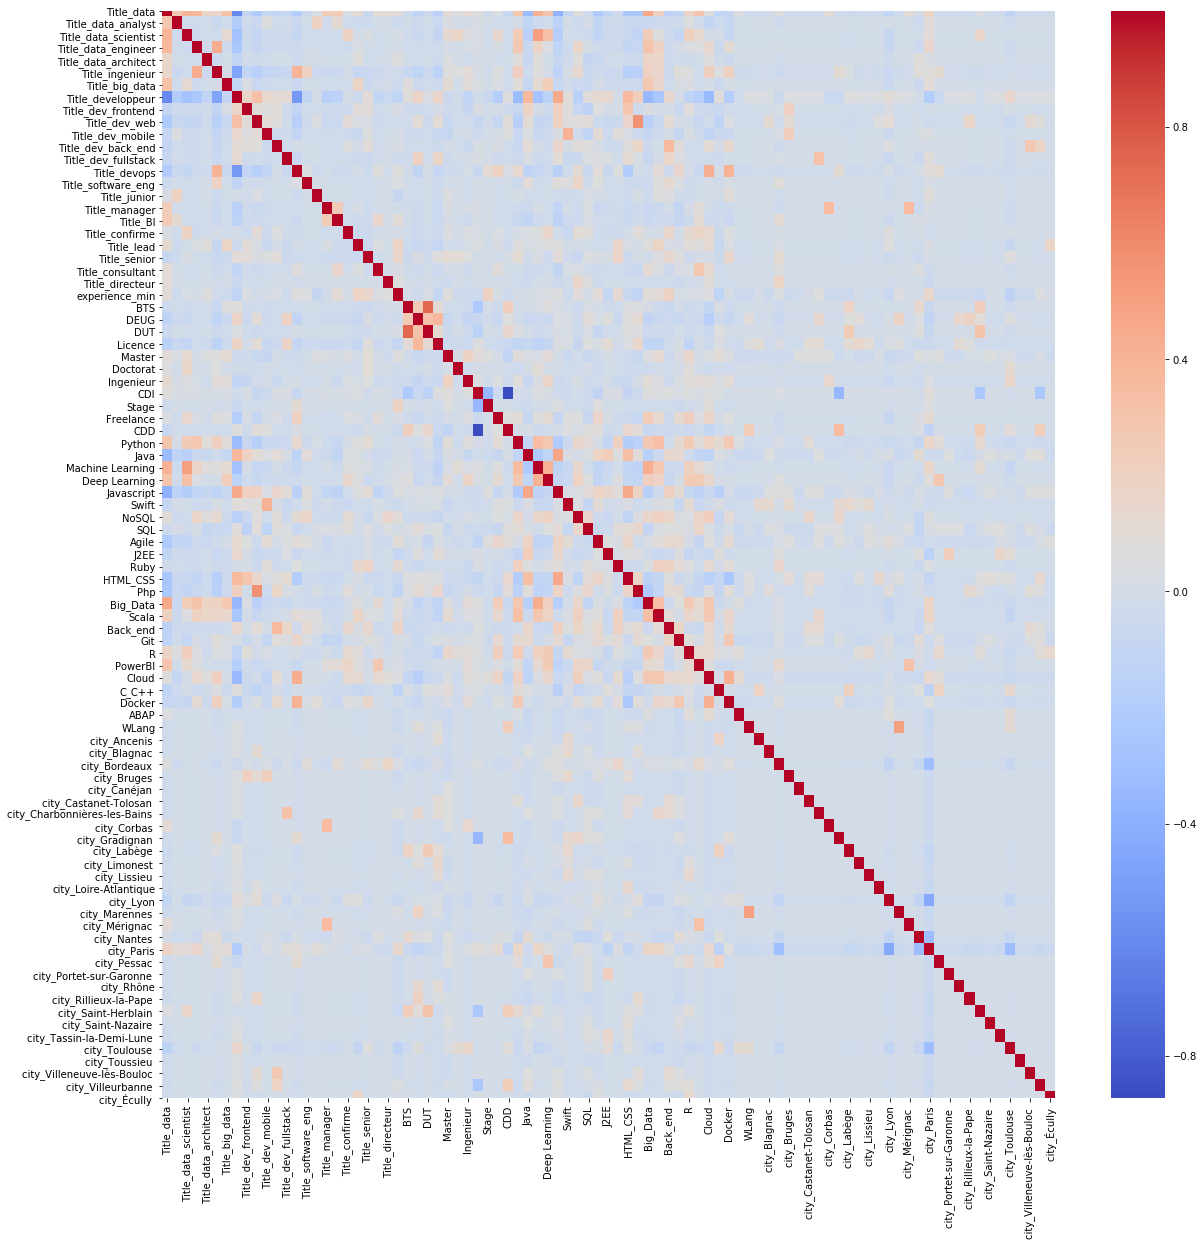

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [36]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.90:
            if columns[j]:
                columns[j] = False

In [37]:
selected_columns = x.columns[columns]
selected_columns.shape

(89,)

There is no correlation but we drop IUT with unique values

# Optimizing by changing hyperparameters

 ## Optimizing logistic regression

In [38]:
logreg = LogisticRegression(solver='saga', n_jobs=-1)

params = {'penalty' : ['l1', 'l2'],
          'C' : np.logspace(-3, 3, 7),
          'fit_intercept': [True, False]}

logreg_gs = GridSearchCV(estimator=logreg, param_grid=params, n_jobs=-1, cv=10)

logreg_gs.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (logreg_gs.best_params_, logreg_gs.best_score_ * 100 ))
print( "Best estimator accuracy on test set {} ".format(logreg_gs.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'} with a score of 55
Best estimator accuracy on test set 48.333333333333336 


C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [39]:
logreg_gs.best_estimator_.score(X_train, y_train) * 100 

71.42857142857143

In [40]:
y_pred=logreg_gs.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[34  3  0 12]
 [ 5  3  1 10]
 [ 0  4  3  4]
 [12  9  2 18]]


## Optimizing SVM linear

In [41]:
svm = SVC()
params = [{'kernel': ['linear'],
           'C': [0.01, 0.1, 1, 10, 100, 1000]}]

svm_gs = GridSearchCV(estimator=svm, param_grid=params, n_jobs=-1, cv=10)

svm_gs.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (svm_gs.best_params_, svm_gs.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(svm_gs.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 0.1, 'kernel': 'linear'} with a score of 55
Best estimator accuracy on test set 55.00 


C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
svm_gs.best_estimator_.score(X_train, y_train) * 100 

66.78571428571428

In [43]:
y_pred=svm_gs.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[37  0  0 12]
 [ 3  3  0 13]
 [ 0  3  2  6]
 [ 9  6  2 24]]


## Optimizing SVM RBF

In [44]:
svm = SVC()
params = [{'kernel': ['rbf'],
          'gamma': np.logspace(-2, 2, 5),
          'C': [0.01, 0.1, 1, 10, 100, 1000]}]

svm_gs = GridSearchCV(estimator=svm, param_grid=params, n_jobs=-1, cv=10)

svm_gs.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (svm_gs.best_params_, svm_gs.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(svm_gs.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 56
Best estimator accuracy on test set 55.83 


C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
svm_gs.best_estimator_.score(X_train, y_train) * 100 

74.64285714285714

In [46]:
y_pred=svm_gs.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[37  1  0 11]
 [ 1  6  1 11]
 [ 0  4  3  4]
 [ 7 10  3 21]]


## Optimizing Random Forest Classifier

In [47]:
forest = RandomForestClassifier()

criterion = ["gini", "entropy"]
n_estimators = [10, 40, 75, 100]
max_depth = [3, 5, 10]
min_samples_split = [2, 5, 10, 50]
min_samples_leaf = [1, 2, 5, 10, 25] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             criterion=criterion)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)


print("The best parameters are %s with a score of %0.0f" % (bestF.best_params_, bestF.best_score_ * 100 ))
print( "Best estimator accuracy on test set {} ".format(bestF.best_estimator_.score(X_test, y_test) * 100 ) )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.5s


The best parameters are {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75} with a score of 59
Best estimator accuracy on test set 54.166666666666664 


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   28.6s finished
C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
bestF.best_estimator_.score(X_train, y_train) * 100 

93.21428571428572

In [49]:
y_pred=bestF.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[39  1  0  9]
 [ 3  4  0 12]
 [ 0  6  2  3]
 [10  9  2 20]]


In [50]:
forest = bestF.best_estimator_
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
feature_importances = pd.DataFrame(data={'feature': X_train.columns,
                                         'importance': forest.feature_importances_})

feature_importances.sort_values('importance', ascending=False).head(30)

,feature,importance
23,experience_min,0.122082
76,city_Paris,0.076494
50,Back_end,0.038555
19,Title_lead,0.031807
84,city_Toulouse,0.029695
7,Title_developpeur,0.029572
42,SQL,0.027944
28,Master,0.027944
56,Docker,0.025915
48,Big_Data,0.024422


## Optimizing XGboost

In [52]:
xgb = XGBClassifier(objective='multi:softmax', n_jobs=-1)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'max_depth': [2, 3, 5]
        }

xgb_gs = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, cv=3)
xgb_gs.fit(X_train, y_train)

C:\Users\Gryshka\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0.5, 1, 2, 5], 'max_depth': [2, 3, 5],
                         'min_chil

In [53]:
xgb_gs.score(X_test, y_test)

0.525

In [54]:
xgb_gs.score(X_train, y_train)

0.7964285714285714

In [55]:
xgb = xgb_gs.best_estimator_
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [56]:
feature_importances = pd.DataFrame(data={'feature': X_train.columns,
                                         'importance': xgb.feature_importances_})

feature_importances.sort_values('importance', ascending=False).head(30)

,feature,importance
84,city_Toulouse,0.058240
76,city_Paris,0.056564
23,experience_min,0.051569
49,Scala,0.041889
19,Title_lead,0.041640
50,Back_end,0.039634
45,Ruby,0.032987
72,city_Lyon,0.032378
7,Title_developpeur,0.031903
46,HTML_CSS,0.031613
